<a href="https://colab.research.google.com/github/namjad381/Machine-Learning-AMD-project/blob/main/Image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload() #Upload kaggle username and key

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"namjad","key":"5f515f39dff4a6f911f93015f24f0b69"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15289  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9307  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4155  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3404  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle datasets download -d 'abdullahhashmi/glassesandnoglassesdataset'

 99% 921M/930M [00:40<00:00, 21.2MB/s]
100% 930M/930M [00:40<00:00, 24.3MB/s]


In [ ]:
! mkdir dataset

In [ ]:
!unzip glassesandnoglassesdataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/all/Images/Images/all/face-927.jpg  
  inflating: dataset/all/Images/Images/all/face-928.jpg  
  inflating: dataset/all/Images/Images/all/face-929.jpg  
  inflating: dataset/all/Images/Images/all/face-93.jpg  
  inflating: dataset/all/Images/Images/all/face-930.jpg  
  inflating: dataset/all/Images/Images/all/face-931.jpg  
  inflating: dataset/all/Images/Images/all/face-932.jpg  
  inflating: dataset/all/Images/Images/all/face-933.jpg  
  inflating: dataset/all/Images/Images/all/face-934.jpg  
  inflating: dataset/all/Images/Images/all/face-935.jpg  
  inflating: dataset/all/Images/Images/all/face-936.jpg  
  inflating: dataset/all/Images/Images/all/face-937.jpg  
  inflating: dataset/all/Images/Images/all/face-938.jpg  
  inflating: dataset/all/Images/Images/all/face-939.jpg  
  inflating: dataset/all/Images/Images/all/face-94.jpg  
  inflating: dataset/all/Images/Images/all/face-940.jpg  
  inflating: dataset/al

In [ ]:
#folder to save CNN model
! mkdir hdf5

In [ ]:
#Libraries to import
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten




## Loading Data


In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
glass = os.listdir("/content/dataset/glassnoglass/Images/Images/glasses")

In [ ]:
categories = []
for filename in glass:
    category = filename.split('.')[0]
    categories.append(0)
df = pd.DataFrame({
    'filename': glass,
    'category': categories
})

In [ ]:
no_glass = os.listdir("/content/dataset/glassnoglass/Images/Images/no_glasses")

In [ ]:
categories = []
for filename in no_glass:
    category = filename.split('.')[0]
    categories.append(1)
df1 = pd.DataFrame({
    'filename': no_glass,
    'category': categories
})

In [ ]:
df =df.append(df1)

In [ ]:
df["category"] = df["category"].replace({1: 'no_glass', 0: 'glass'}) 

## Total Labels

In [ ]:
df['category'].value_counts()

glass       2769
no_glass    2151
Name: category, dtype: int64

In [ ]:
df

,filename,category
0,face-2762.jpg,glass
1,face-4933.jpg,glass
2,face-1942.jpg,glass
3,face-3991.jpg,glass
4,face-4998.jpg,glass
...,...,...
2146,face-1253.jpg,no_glass
2147,face-3126.jpg,no_glass
2148,face-4296.jpg,no_glass
2149,face-269.jpg,no_glass


## Splitting Data

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

## Creating Train and Test Data

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    ("/content/dataset/all/Images/Images/all"), 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=50
)

Found 3936 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    ("/content/dataset/all/Images/Images/all"), 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=50
)

Found 984 validated image filenames belonging to 2 classes.


## Images

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


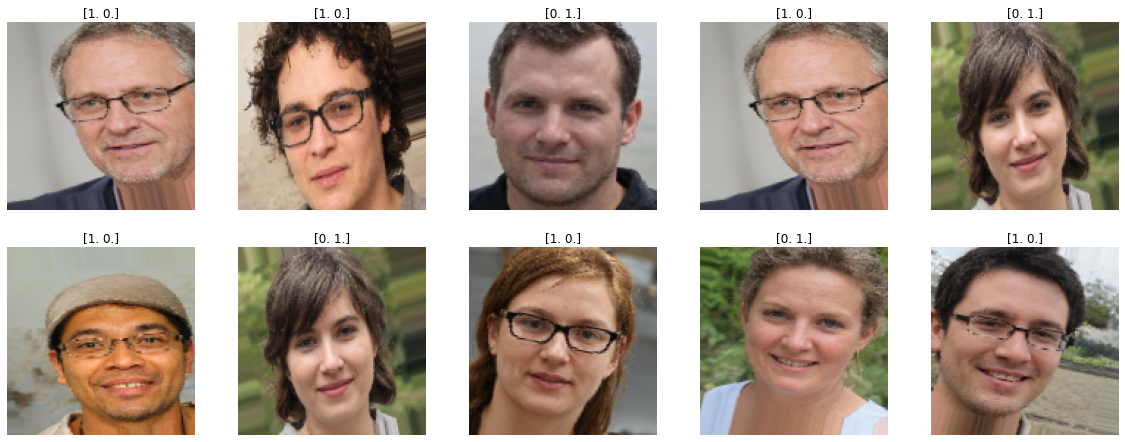

In [ ]:
x,y = train_generator.next()
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x),10))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(x[i] , cmap='gray')
    plt.title(y[i])
    plt.axis('off')     
plt.show()

# Create the Model

In [ ]:
GlassModel = keras.Sequential(
    [
        keras.Input(shape=(128, 128, 3)),
        layers.Conv2D(256, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"),
        layers.Conv2D(512, (3, 3), strides=(2, 2), padding="same"),
        layers.Flatten(),
        layers.Dense(2),
    ],
    name="GlassModel",
)

In [ ]:
GlassModel.summary()

Model: "GlassModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 256)       7168      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 2)                 1048578   
                                                        

In [ ]:
# Train Model 
GlassModel.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

In [ ]:

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpointer = ModelCheckpoint(filepath=("/content/hdf5"), 
                               verbose=1, save_best_only=True)
callbacks = [earlystop, learning_rate_reduction, checkpointer]

In [ ]:
epochs=10
history = GlassModel.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
79/79 [==============================] - ETA: 0s - loss: 1.7390 - categorical_accuracy: 0.6474
Epoch 00001: val_loss improved from inf to 0.21913, saving model to /content/hdf5
INFO:tensorflow:Assets written to: /content/hdf5/assets
79/79 [==============================] - 744s 9s/step - loss: 1.7390 - categorical_accuracy: 0.6474 - val_loss: 0.2191 - val_categorical_accuracy: 0.9075 - lr: 0.0010
Epoch 2/10
79/79 [==============================] - ETA: 0s - loss: 0.2644 - categorical_accuracy: 0.8869
Epoch 00002: val_loss improved from 0.21913 to 0.07044, saving model to /content/hdf5
INFO:tensorflow:Assets written to: /content/hdf5/assets
79/79 [==============================] - 737s 9s/step - loss: 0.2644 - categorical_accuracy: 0.8869 - val_loss: 0.0704 - val_categorical_accuracy: 0.9746 - lr: 0.0010
Epoch 3/10
79/79 [==============================] - ETA: 0s - loss: 0.2176 - categorical_accuracy: 0.9101
Epoch 00003: val_loss improved from 0.07044 to 0.05631, saving model

## Plotting Loss and Accuracy of Model

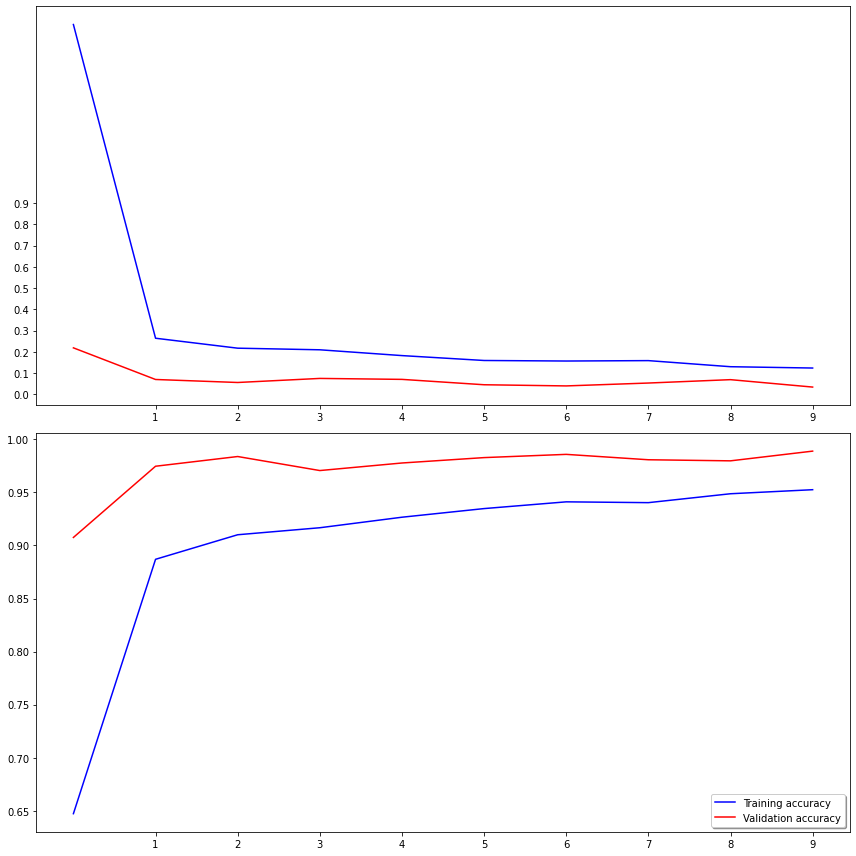

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['categorical_accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_categorical_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Prediction

In [ ]:
test_filenames = os.listdir("/content/dataset/all/Images/Images/all")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    validate_df, 
    "/content/dataset/all/Images/Images/all", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=50,
    shuffle=False
)

Found 984 validated image filenames.


In [ ]:
nb_samples = validate_df.shape[0]
predict = GlassModel.predict_generator(test_generator, steps=np.ceil(nb_samples/50))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
predict[0]

array([ 4.2953  , -4.291426], dtype=float32)

In [ ]:
validate_df['pred_category'] = np.argmax(predict, axis=-1)

In [ ]:
train_generator.class_indices.items()

dict_items([('glass', 0), ('no_glass', 1)])

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['pred_category'] = validate_df['pred_category'].replace(label_map)

## Save Model

In [ ]:
GlassModel.save("glass.h5")

## Confusion Matrix and CLassificaion Report

In [ ]:
validate_df['pred_category'] = validate_df['pred_category'].replace({ 'glass': 0, 'no_glass': 1})

In [ ]:
validate_df["category"] = validate_df["category"].replace({'glass':0, 'no_glass':1}) 

In [ ]:
cm = confusion_matrix(validate_df['category'], validate_df['pred_category'])

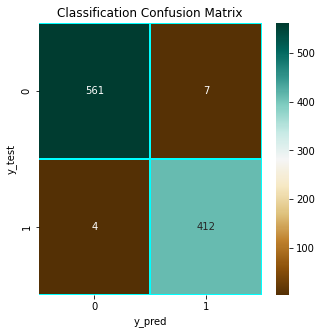

In [ ]:
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
print(classification_report(validate_df['category'], validate_df['pred_category']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       568
           1       0.98      0.99      0.99       416

    accuracy                           0.99       984
   macro avg       0.99      0.99      0.99       984
weighted avg       0.99      0.99      0.99       984



## Prediction

glass


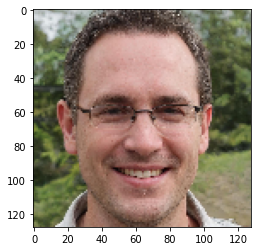

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/dataset/all/Images/Images/all/face-1002.jpg",target_size=(128,128))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("./glass.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("glass")
else:
    print('no glass')

no glass


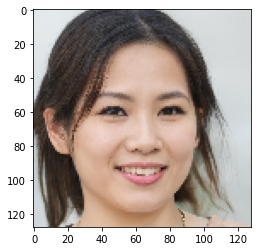

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/dataset/all/Images/Images/all/face-1007.jpg",target_size=(128,128))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("./glass.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("glass")
else:
    print('no glass')

glass


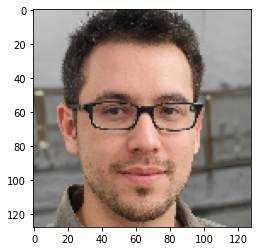

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/dataset/all/Images/Images/all/face-1023.jpg",target_size=(128,128))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("./glass.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("glass")
else:
    print('no glass')

#**AlexNet**

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=227
IMAGE_HEIGHT=227
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    ("/content/dataset/all/Images/Images/all"), 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=50
)

Found 3936 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    ("/content/dataset/all/Images/Images/all"), 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=50
)

Found 984 validated image filenames belonging to 2 classes.


In [ ]:
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(2))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization_9 (Batc  (None, 57, 57, 96)       384       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 256)       614656    
                                                                 
 batch_normalization_10 (Bat  (None, 29, 29, 256)     

In [ ]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
epochs=10
history = AlexNet.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/10
79/79 [==============================] - 864s 11s/step - loss: 0.2922 - accuracy: 0.9027 - val_loss: 2.1161 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 2/10
79/79 [==============================] - 854s 11s/step - loss: 0.1452 - accuracy: 0.9809 - val_loss: 1.3017 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 3/10
79/79 [==============================] - 845s 11s/step - loss: 0.1308 - accuracy: 0.9825 - val_loss: 0.3793 - val_accuracy: 0.8343 - lr: 0.0010
Epoch 4/10
79/79 [==============================] - 855s 11s/step - loss: 0.1155 - accuracy: 0.9840 - val_loss: 0.8561 - val_accuracy: 0.6148 - lr: 0.0010
Epoch 5/10
79/79 [==============================] - 842s 11s/step - loss: 0.0990 - accuracy: 0.9878 - val_loss: 0.6692 - val_accuracy: 0.5976 - lr: 0.0010
Epoch 6/10
79/79 [==============================] - 851s 11s/step - loss: 0.0937 - accuracy: 0.9888 - val_loss: 0.3389 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 7/10
79/79 [==============================] - 851s 11s/step - lo

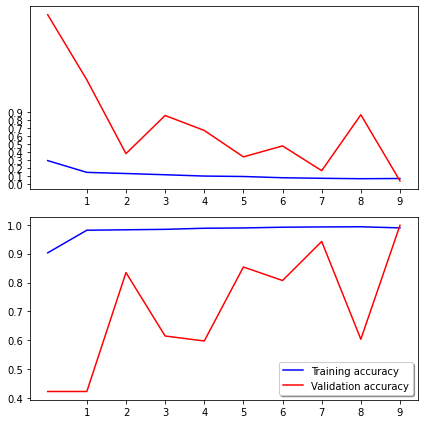

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#**Performance Evaluation**

In [ ]:
nb_samples = validate_df.shape[0]
predict = AlexNet.predict_generator(test_generator, steps=np.ceil(nb_samples/50))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [131]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['pred_category'] = validate_df['pred_category'].replace(label_map)
cm = confusion_matrix(validate_df['category'], validate_df['pred_category'])

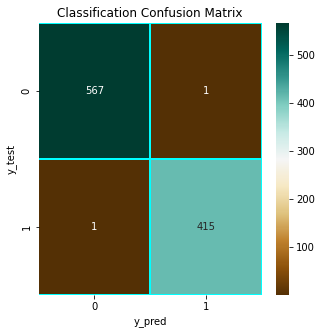

In [ ]:
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

#**LeNet-5 Architecture**

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    ("/content/dataset/all/Images/Images/all"), 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=50
)

Found 3936 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    ("/content/dataset/all/Images/Images/all"), 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=50
)

Found 984 validated image filenames belonging to 2 classes.


In [ ]:
#Model summary

LeNet_model = Sequential()
LeNet_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32, 32, 3)))
LeNet_model.add(MaxPool2D(strides=2))
LeNet_model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
LeNet_model.add(MaxPool2D(strides=2))
LeNet_model.add(Flatten())
LeNet_model.add(Dense(256, activation='relu'))
LeNet_model.add(Dense(84, activation='relu'))
LeNet_model.add(Dense(2, activation='softmax'))

LeNet_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 48)        38448     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 48)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1728)              0         
                                                                 
 dense_35 (Dense)            (None, 256)             

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acaccuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
LeNet_model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [122]:
epochs=10
LeNet_history = LeNet_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/10
79/79 [==============================] - 83s 1s/step - loss: 0.6384 - accuracy: 0.6369 - val_loss: 0.4897 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 2/10
79/79 [==============================] - 82s 1s/step - loss: 0.4166 - accuracy: 0.8044 - val_loss: 0.2531 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 3/10
79/79 [==============================] - 82s 1s/step - loss: 0.2949 - accuracy: 0.8750 - val_loss: 0.1989 - val_accuracy: 0.9207 - lr: 0.0010
Epoch 4/10
79/79 [==============================] - 81s 1s/step - loss: 0.2375 - accuracy: 0.9052 - val_loss: 0.1734 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 5/10
79/79 [==============================] - 81s 1s/step - loss: 0.1942 - accuracy: 0.9190 - val_loss: 0.1261 - val_accuracy: 0.9502 - lr: 0.0010
Epoch 6/10
79/79 [==============================] - 80s 1s/step - loss: 0.1491 - accuracy: 0.9416 - val_loss: 0.1197 - val_accuracy: 0.9553 - lr: 0.0010
Epoch 7/10
79/79 [==============================] - 80s 1s/step - loss: 0.1499 - a

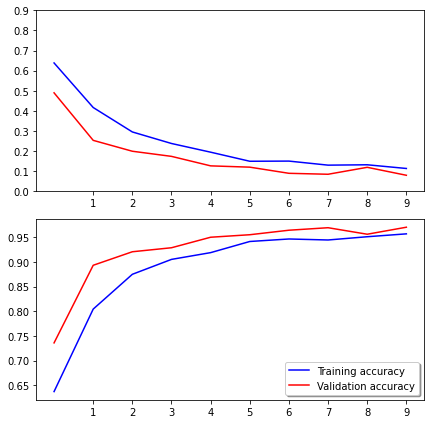

In [123]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.plot(LeNet_history.history['loss'], color='b', label="Training loss")
ax1.plot(LeNet_history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(LeNet_history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(LeNet_history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#**Performance Evaluation**

In [124]:
nb_samples = validate_df.shape[0]
predict_3 = LeNet_model.predict_generator(test_generator, steps=np.ceil(nb_samples/50))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [129]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['pred_category'] = validate_df['pred_category'].replace(label_map)
cm_3 = confusion_matrix(validate_df['category'], validate_df['pred_category'])


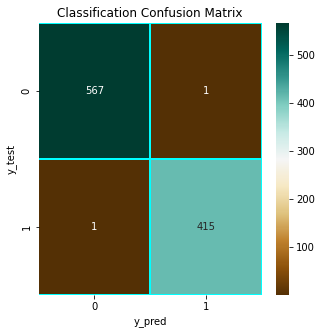

In [130]:
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_3, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()